# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('/content/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Printing the number of rows and columns in the DataFrame
# df.shape[0] returns the number of rows, and df.shape[1] returns the number of columns
print('The data frame has', df.shape[0], 'Rows and', df.shape[1],'columns')

The data frame has 1898 Rows and 9 columns


#### Observations:
The DataFrame has 1,898 rows and 9 columns, indicating a moderate-sized dataset with a manageable number of variables for analysis.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# info() provides a concise summary of the DataFrame, including the number of non-null entries, data types for each column, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The dataset is clean with no missing values.
The data types are appropriate for the variables, with integers for IDs and times, floats for costs, and objects for categorical data.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values in the dataset. All 1,898 entries are complete across all columns, so no additional cleaning or filling in of data is needed before analysis.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

Minimum Time: The shortest time it takes to prepare an order is 20 minutes.
Average Time: On average, it takes approximately 27.37 minutes to prepare an order.
Maximum Time: The longest time recorded for food preparation is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Count the number of orders where the rating is 'Not given'
not_rated_count = df['rating'].value_counts().get('Not given',0)
print(f"Number of orders that are not rated: {not_rated_count}")


Number of orders that are not rated: 736


#### Observations:
Out of 1,898 orders, 736 haven't been rated by customers. This suggests a considerable portion of the data lacks feedback, which could impact the analysis of customer satisfaction. It may be worth exploring why so many customers are not providing ratings.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

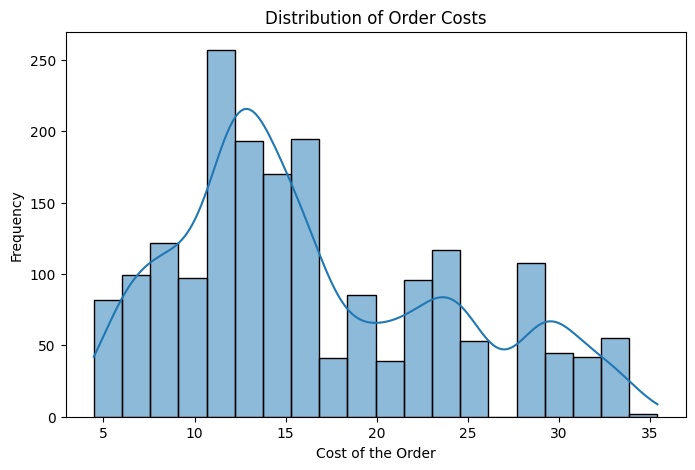

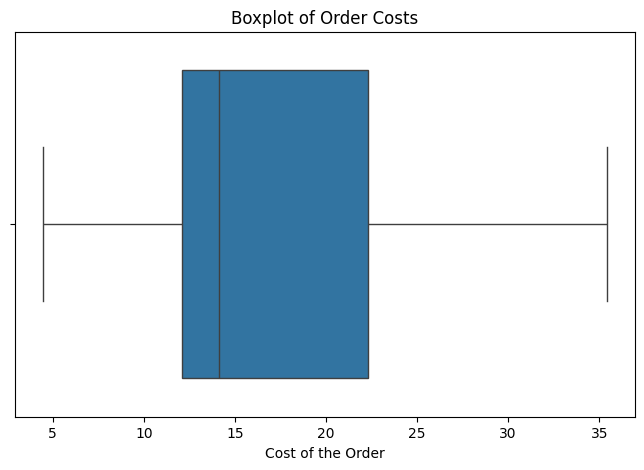

In [9]:
# Histogram for cost of the order
plt.figure(figsize=(8, 5))
sns.histplot(df['cost_of_the_order'], bins=20, kde=True)
plt.title('Distribution of Order Costs')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

# Boxplot for cost of the order
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['cost_of_the_order'])
plt.title('Boxplot of Order Costs')
plt.xlabel('Cost of the Order')
plt.show()



Observations

Histogram:

The distribution of order costs shows a clear peak between 10 and 15 USD, indicating that most orders fall within this price range.
The distribution is  right-skewed, with a gradual decline in frequency as the cost increases.
There are several smaller peaks, particularly around 20 and 25 USD, suggesting additional common price points for orders.

Boxplot:

The median cost of orders is around 14 USD, as indicated by the line within the box.
The interquartile range (IQR) spans from approximately 12 to 22 USD, showing that the middle 50% of orders are within this cost range.
There are no significant outliers, as all data points fall within the whiskers, the boxplot shows a right-skew (positive skewness)



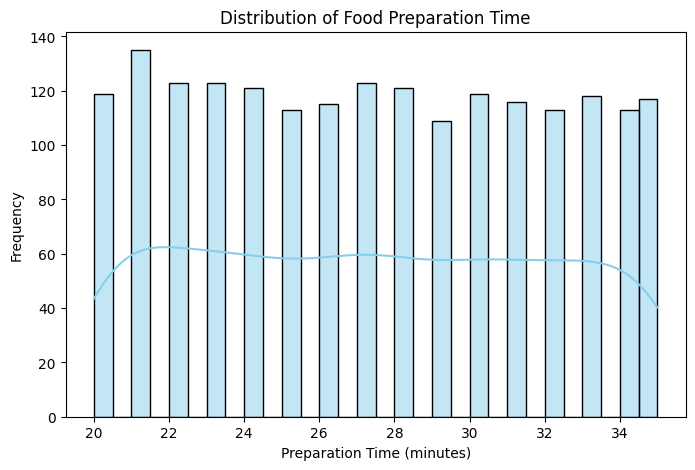

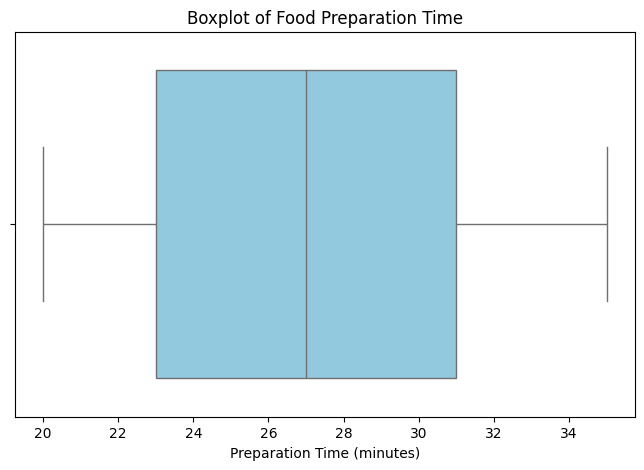

In [10]:
# Histogram for food preparation time
plt.figure(figsize=(8, 5))
sns.histplot(df['food_preparation_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for food preparation time
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['food_preparation_time'], color='skyblue')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.show()

Observations

Histogram:

The histogram indicates a fairly uniform distribution of preparation times between 20 and 35 minutes, with some minor peaks and troughs.

Boxplot:

The boxplot complements this by showing a slight right-skew and a consistent range of preparation times without any outliers.

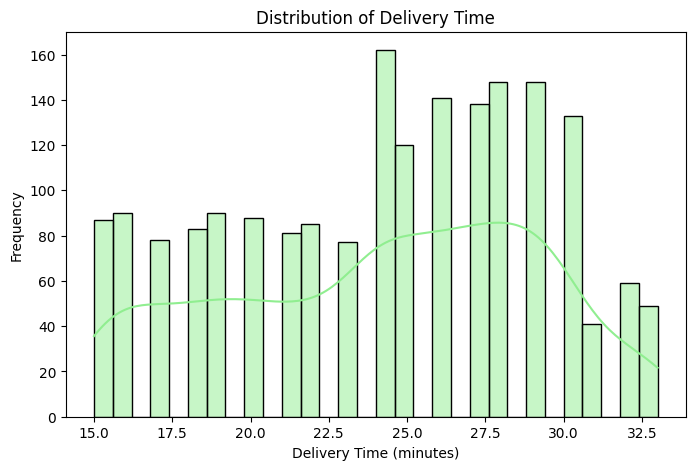

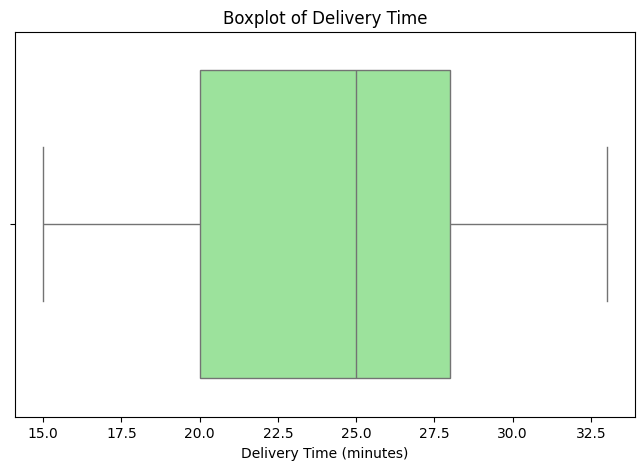

In [11]:
# Histogram for delivery_time
plt.figure(figsize=(8, 5))
sns.histplot(df['delivery_time'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for delivery_time
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['delivery_time'], color='lightgreen')
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

Observations

Histogram:

The highest concentration is observed in the 25 to 30 minute range with a left-skew

Boxplot:

The boxplot confirms a slight left skew in the distribution of delivery times. The median delivery time is closer to the upper quartile.


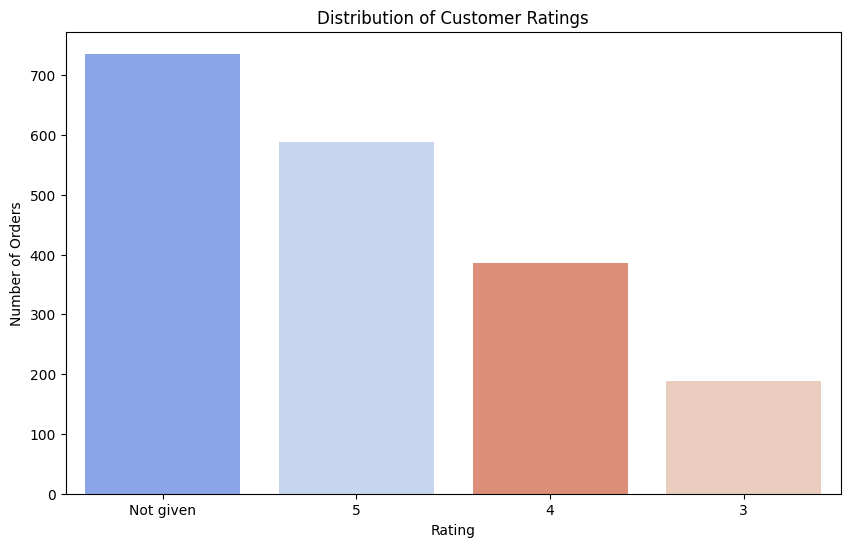

In [12]:
# Count Plot for rating
plt.figure(figsize=(10, 6))
sns.countplot(x=df['rating'], hue=df['rating'], palette='coolwarm', order=df['rating'].value_counts().index, legend=False)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()

Observations:

The most common "rating" is "Not given," with over 700 orders. This suggests that a significant number of customers did not provide a rating for their orders.

Rating of 5 is the most frequent actual ranking, with over 500 orders receiving this rating.

There is a noticeable drop in frequency as the ratings decrease from 5 to 3. Fewer customers rated their orders as 4, and even fewer gave a rating of 3.

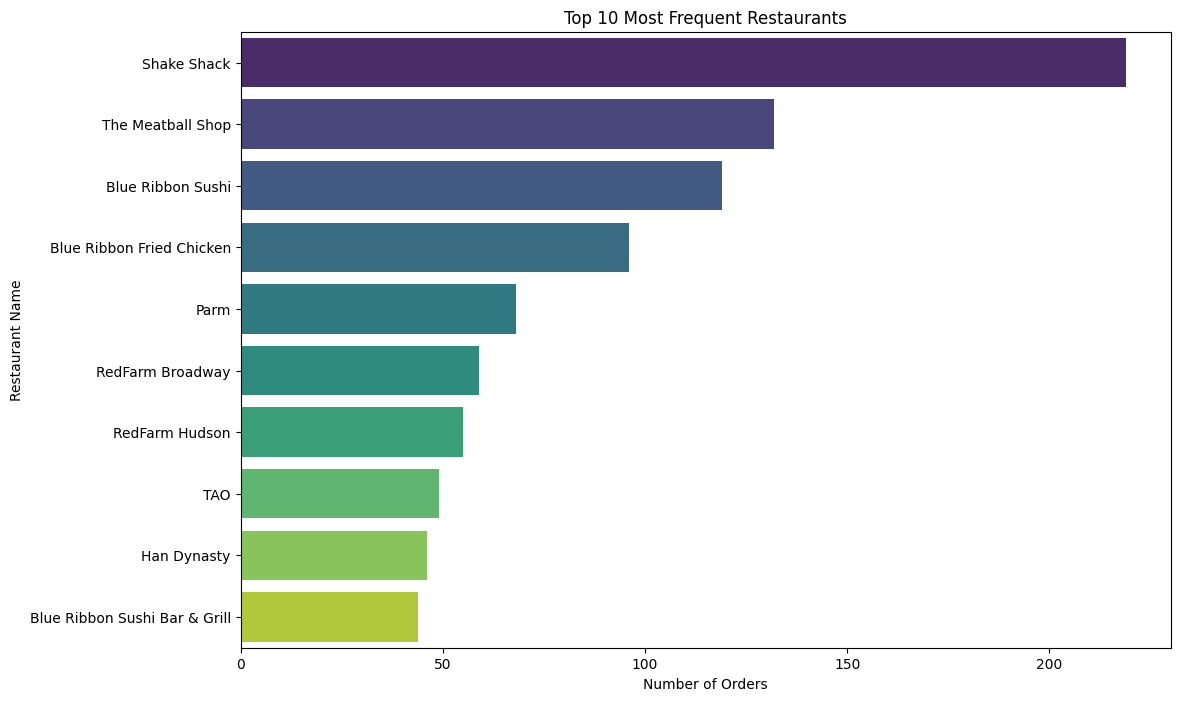

In [13]:
# Count the number of orders per restaurant
restaurant_counts = df['restaurant_name'].value_counts().head(10)  # Displaying top 10 restaurants

# Plotting the bar
plt.figure(figsize=(12, 8))
sns.barplot(x=restaurant_counts.values, y=restaurant_counts.index, hue=restaurant_counts.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Most Frequent Restaurants')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()

Observations:

The bar plot reveals that a few restaurants dominate the order count, with the top restaurant significantly outperforming the others. This concentration suggests strong customer preferences for certain restaurants.

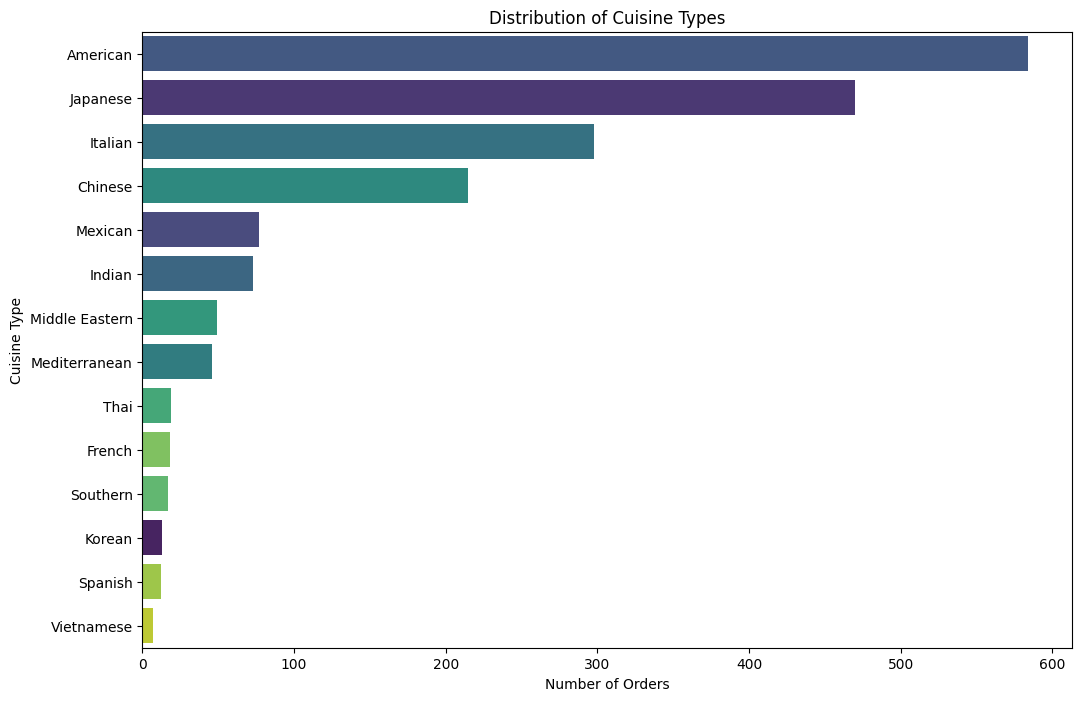

In [14]:
# Count the number of orders per cuisine type
cuisine_counts = df['cuisine_type'].value_counts()

# Plotting the count plot
plt.figure(figsize=(12, 8))
sns.countplot(y=df['cuisine_type'], hue=df['cuisine_type'], order=cuisine_counts.index, palette='viridis', dodge=False, legend=False)
plt.title('Distribution of Cuisine Types')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.show()

Observations:

The distribution shows a clear preference for American cuisine, followed by Japanese and Italian, which are also quite popular. While these top three dominate, there is still significant interest in a variety of other cuisines like Chinese, Mexican, and Indian. Niche cuisines like Vietnamese and Spanish have lower order counts

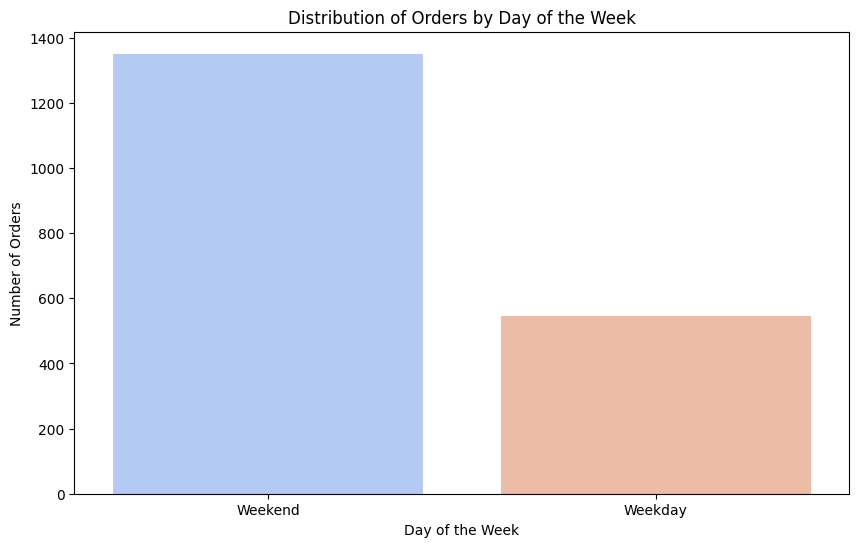

In [15]:
# Count the number of orders per day of the week
day_counts = df['day_of_the_week'].value_counts()

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x=df['day_of_the_week'],hue=df['day_of_the_week'], order=day_counts.index, palette='coolwarm')
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

Observations:

The plot indicates a significantly higher number of orders on weekends compared to weekdays.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [16]:
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

Shake Shack's Dominance: Shake Shack has the highest number of orders (219), indicating it is the most popular restaurant among customers.

The Meatball Shop's Strong Presence: The Meatball Shop also shows significant popularity with 132 orders, making it the second most frequented restaurant on the list.

Consistent Popularity: Blue Ribbon Sushi and Blue Ribbon Fried Chicken have 119 and 96 orders, respectively, indicating steady customer interest.

Parm's Niche Appeal: Parm, with 68 orders, has a smaller but noteworthy customer base, suggesting it appeals to a more specific segment of customers.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [17]:
most_popular_cuisine_on_weekends = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()
total_weekend_orders = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].count()
percentage_result = (most_popular_cuisine_on_weekends.iloc[0] / total_weekend_orders) * 100
print(f" Out of the {total_weekend_orders} total weekend orders, the most popular cuisine on weekends is {most_popular_cuisine_on_weekends.index[0]} with {most_popular_cuisine_on_weekends.iloc[0]} orders, which is the {percentage_result:.2f}% of the total")

 Out of the 1351 total weekend orders, the most popular cuisine on weekends is American with 415 orders, which is the 30.72% of the total


#### Observations:

The observation indicates that American cuisine is the most preferred choice on weekends, accounting for 30.72% of the total 1,351 weekend orders. This dominance suggests a strong customer preference for American food, significantly outpacing other cuisines in popularity during weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
percentage_above_20 = (df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]) * 100

# Print the result
print(f"The percentage of orders that cost more than 20 dollars is {percentage_above_20:.2f}%.")


The percentage of orders that cost more than 20 dollars is 29.24%.


#### Observations:

The observation shows that a significant portion of the orders, 29.24%, exceed $20, indicating that nearly one-third of the customers are willing to spend more for their meals. This suggests a substantial demand for higher-priced menu items.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Print the result
print(f"The mean order delivery time is {mean_delivery_time:.2f} minutes.")


The mean order delivery time is 24.16 minutes.


#### Observations:

The average delivery time of 24.16 minutes suggests that the delivery process is relatively efficient, with most orders being fulfilled within a reasonable timeframe.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [20]:
top_5_customers = df['customer_id'].value_counts().head(5)
print(top_5_customers)


customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


#### Observations:

The observation highlights that the top five most frequent customers have placed between 7 and 13 orders. Customer 52832 is the most active, with 13 orders, indicating strong loyalty and engagement. This data suggests that a small group of customers contributes significantly to repeat business.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


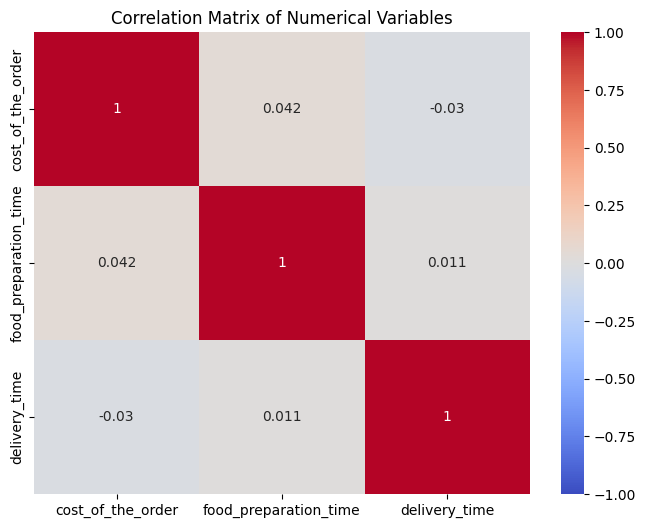

In [21]:
# Calculate the correlation matrix
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Observations:

The correlation matrix shows that there are very weak correlations between the numerical variables in the dataset. The highest correlation is between cost_of_the_order and food_preparation_time, but even this is minimal (0.042), indicating that changes in one variable do not strongly predict changes in another. Overall, these variables are largely independent of each other.

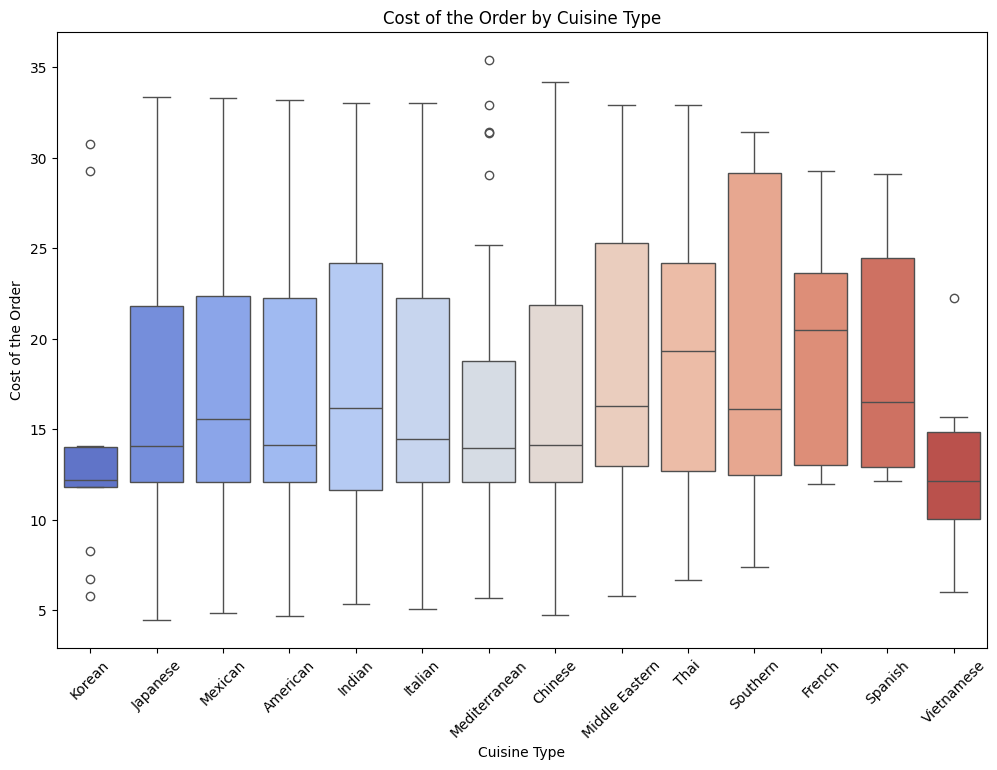

In [22]:
# Boxplot of Cost of the Order by Cuisine Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', data=df, palette='coolwarm', dodge=False, legend=False)
plt.xticks(rotation=45)
plt.title('Cost of the Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.show()

Observations:

The boxplot shows a wide variation in the cost of orders across different cuisines. Korean and Vietnamese cuisines have the lowest median costs, while Thai, French, and Spanish cuisines have higher median costs. There are outliers in some cuisines, especially in Korean and mediterranean, indicating some orders are significantly more expensive than others within these categories.

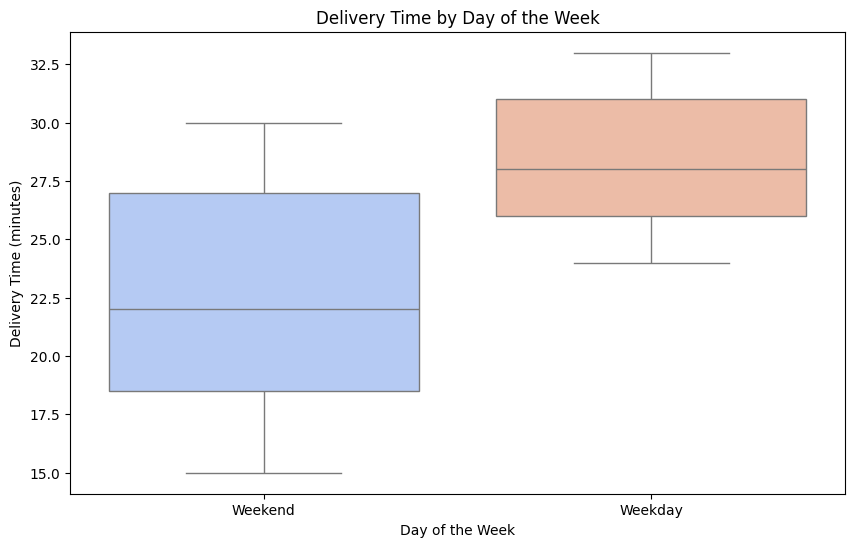

In [23]:
# Boxplot of Delivery Time by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', hue='day_of_the_week', data=df, palette='coolwarm', dodge=False, legend=False)
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()

Observations:

The boxplot shows that delivery times tend to be slightly longer on weekdays compared to weekends. The median delivery time is higher on weekdays, and the range of delivery times is also more compressed. Weekends exhibit a wider range of delivery times.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [24]:
# Step 1: Filter out rows where rating is 'Not given'
df_ratings_filtered = df[df['rating'] != 'Not given'].copy()

# Step 2: Convert the 'rating' column to float
df_ratings_filtered.loc[:, 'rating'] = df_ratings_filtered['rating'].astype(float)

# Step 3: Group by 'restaurant_name' and calculate rating count and average rating
restaurant_grouped = df_ratings_filtered.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Step 4: Filter the grouped data for the promotional offer criteria
eligible_restaurants = restaurant_grouped[(restaurant_grouped['count'] > 50) & (restaurant_grouped['mean'] > 4)]

# Step 5: Display the filtered DataFrame
print(eligible_restaurants)



                           count mean
restaurant_name                      
Blue Ribbon Fried Chicken     64 4.33
Blue Ribbon Sushi             73 4.22
Shake Shack                  133 4.28
The Meatball Shop             84 4.51


#### Observations:

All four restaurants—Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop—exhibit strong customer satisfaction with average ratings above 4.2. Shake Shack is the most popular, receiving the highest number of ratings (133), while The Meatball Shop leads in customer satisfaction with an average rating of 4.51. These restaurants are ideal candidates for the promotional offer, meeting the criteria with both high ratings and significant customer engagement.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [25]:
# Step 1: Apply the 25% commission to orders costing more than $20
high_value_orders = df[df['cost_of_the_order'] > 20]
high_value_revenue = high_value_orders['cost_of_the_order'] * 0.25

# Step 2: Apply the 15% commission to orders costing more than $5 and up to $20
mid_value_orders = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]
mid_value_revenue = mid_value_orders['cost_of_the_order'] * 0.15

# Step 3: Calculate the total net revenue
total_revenue = high_value_revenue.sum() + mid_value_revenue.sum()

# Display the result
print(f"The net revenue generated by the company across all orders is ${total_revenue:.2f}")


The net revenue generated by the company across all orders is $6166.30


#### Observations:

The company has successfully generated a net revenue of $6,166.30 from its commission-based model. This amount reflects the application of a tiered commission structure, with higher commissions on more expensive orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [26]:
# Step 1: Calculate the total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Step 2: Count the number of orders taking more than 60 minutes
orders_above_60 = df[df['total_time'] > 60].shape[0]

# Step 3: Calculate the total number of orders
total_orders = df.shape[0]

# Step 4: Calculate the percentage of orders taking more than 60 minutes
percentage_above_60 = (orders_above_60 / total_orders) * 100

# Display the result
print(f"The percentage of orders that take more than 60 minutes to get delivered is {percentage_above_60:.2f}%.")


The percentage of orders that take more than 60 minutes to get delivered is 10.54%.


#### Observations:

The observation indicates that 10.54% of orders take more than 60 minutes from the time they are placed to the time they are delivered. While the majority of orders are delivered within an hour, the fact that over 10% exceed this time threshold suggests potential inefficiencies in the preparation or delivery process.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [27]:
# Step 1: Calculate the mean delivery time for weekdays and weekends
mean_delivery_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Step 2: Display the results
print(f"The mean delivery time on weekdays is {mean_delivery_weekdays:.2f} minutes.")
print(f"The mean delivery time on weekends is {mean_delivery_weekends:.2f} minutes.")


The mean delivery time on weekdays is 28.34 minutes.
The mean delivery time on weekends is 22.47 minutes.


#### Observations:

The observation shows a clear difference in delivery efficiency between weekdays and weekends. The mean delivery time on weekdays is 28.34 minutes, which is significantly longer than the 22.47 minutes on weekends. This suggests that deliveries are more efficient on weekends, possibly due to less traffic, fewer orders, or more streamlined operations.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

**Popular Cuisine Types:**

American cuisine dominates the orders, particularly on weekends, indicating strong customer preference. Japanese and Italian cuisines are also consistently popular.

**Customer Spending:**

Nearly 30% of orders cost more than $20, showing a significant portion of customers are willing to spend on higher-priced menu items.

**Delivery Efficiency:**

Delivery times are shorter on weekends (22.47 minutes) compared to weekdays (28.34 minutes), suggesting more efficient operations on weekends.

**Customer Loyalty:**

A small group of customers (top 5) contributes significantly to repeat business, with the most frequent customer placing 13 orders.

**Revenue Generation:**

The company generated 6,166.30 USD in net revenue from commission fees, with higher revenue coming from orders costing more than $20.

**Delivery Time Concerns:**

10.54% of orders take more than 60 minutes to be delivered, indicating room for improvement in speeding up the preparation and delivery process.

### Recommendations:

**Expand American Cuisine Offerings:**

Given the strong preference for American cuisine, consider expanding the variety of American dishes offered or partnering with more American restaurants to capitalize on this demand.

**Optimize Weekday Delivery Operations:**

Investigate the factors contributing to longer delivery times on weekdays and implement changes such as adjusting staffing levels or optimizing delivery routes to reduce delays and improve customer satisfaction.

**Targeted Promotions for High-Spending Customers:**

Introduce targeted promotions or loyalty programs for customers who frequently place orders over $20, as they represent a significant revenue source for the company.

**Enhance Customer Feedback Mechanisms:**

Encourage more customers to leave ratings and feedback, particularly for cuisines that have lower average ratings. This can help identify areas for improvement and ensure that underperforming restaurants are supported in enhancing their offerings.

**Address Long Delivery Times:**

Focus on reducing the percentage of orders that take more than 60 minutes by identifying bottlenecks in the preparation or delivery process. Consider implementing real-time tracking and feedback loops to monitor and improve delivery times.

**Leverage Data for Restaurant Partnerships:**

Use the insights from customer preferences and ratings to strengthen partnerships with popular restaurants and encourage underperforming restaurants to improve their service. This could involve sharing data-driven recommendations with restaurant partners to help them align with customer expectations.

---